In [10]:
import numpy as np
import copy
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage  # PIL and scipy are used here to test the model with my own picture at the end.
from lr_utils import load_dataset

In [11]:
#Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


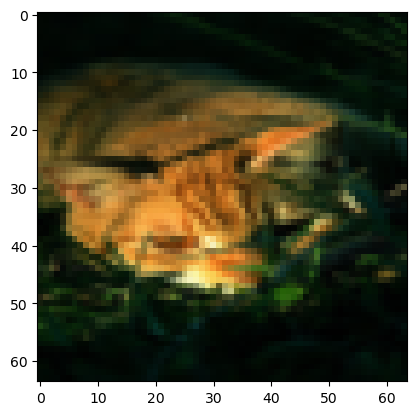

In [17]:
#Exemple of a picture
index = 41
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")

In [18]:
# train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [19]:
# Reshape the training and test datasets that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px * num_px * 3, 1)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [20]:
# Strandardize the dataset by dividing every row of the dataset by 255 (RGB value of each pixel)
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

**The main steps for building a Neural Network are:**
1. *Define the model structure (such as number of input features, number of layers, number of neurons in each layer ...)*
2. *Initialize the model's parameters*
3. *Loop:*
    - *Calculate current loss (forward propagation)*
    - *Calculate current gradient (backward propagation)*
    - *Update parameters (gradient descent)*

*Then integrate these three steps into one function called `model()`.*

In [21]:
# Sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [22]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


**Initializing parameters**

In [23]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.0
    return w,b

In [24]:
dim = 2
w,b = initialize_with_zeros(dim)
print("w = " +str(w))
print("b = " +str(b))


w = [[0.]
 [0.]]
b = 0.0
